# Testing

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from FFNN.Model import FFNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Import Dataset

In [3]:
mnist = fetch_openml("mnist_784", parser='auto')
X = mnist.data.astype(np.float32) 
y = mnist.target.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42,
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### From Scratch

In [4]:
layers = [X_train.shape[1], 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
loss = 'categorical_cross_entropy'

model = FFNN(layers, activations, loss, init_method='xavier', seed=42)
history = model.train(X_train, y_train, epochs=15, lr=0.01, batch_size=128)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Epoch 1/15, Loss: 0.5089128333230631
Epoch 2/15, Loss: 0.33639626318004107
Epoch 3/15, Loss: 0.2714252837984275
Epoch 4/15, Loss: 0.23308057065621954
Epoch 5/15, Loss: 0.2063651352570978
Epoch 6/15, Loss: 0.1863506531589287
Epoch 7/15, Loss: 0.17040886280015594
Epoch 8/15, Loss: 0.1573139646467967
Epoch 9/15, Loss: 0.1463566670493558
Epoch 10/15, Loss: 0.13693436501083137
Epoch 11/15, Loss: 0.12873356621151982
Epoch 12/15, Loss: 0.12148063802870021
Epoch 13/15, Loss: 0.1149843927129525
Epoch 14/15, Loss: 0.1091233809177362
Epoch 15/15, Loss: 0.10379027221293746
Accuracy: 0.9542142857142857


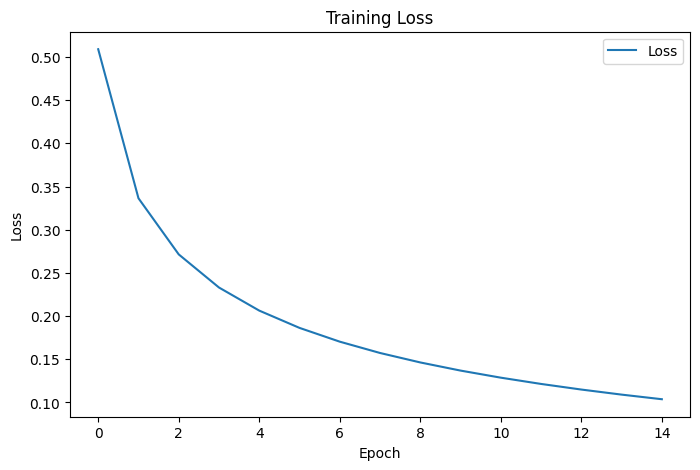

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

### MLP

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=15,
    batch_size=128,
    random_state=42,
    verbose=True    
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy}")

Iteration 1, loss = 0.28982268
Iteration 2, loss = 0.19669466
Iteration 3, loss = 0.17624395
Iteration 4, loss = 0.18481328
Iteration 5, loss = 0.16104644
Iteration 6, loss = 0.15493572
Iteration 7, loss = 0.16028424
Iteration 8, loss = 0.14843655
Iteration 9, loss = 0.14406804
Iteration 10, loss = 0.14535774
Iteration 11, loss = 0.16075757
Iteration 12, loss = 0.15893637
Iteration 13, loss = 0.15713710
Iteration 14, loss = 0.13828262
Iteration 15, loss = 0.14639978
Accuracy: 0.9538571428571428


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
